import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
file_path = (r'E:\New folder\Suicide_bombing_attacks.csv') 

# Replace with the actual file path
df = pd.read_csv(file_path)

In [7]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows of the dataframe
df.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date                         0
Islamic Date               310
Blast Day Type              21
Holiday Type               844
Time                       422
City                         0
Latitude                     5
Longitude                    5
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space           70
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                 292
Killed Max                   0
Injured Min                262
Injured Max                 64
No. of Suicide Blasts      164
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)              10
Temperature(F)              14
dtype: int64


In [11]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [15]:
# Check for non-numeric entries in the 'Longitude' column
non_numeric_longitude = df['Longitude'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
print(df[non_numeric_longitude]['Longitude'])

# Convert non-numeric entries to NaN
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Fill missing values in 'Longitude' with the mean
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

# Display the first few rows to verify changes
df.head()


449           NaN
450           NaN
478     71.456944
492           NaN
945           NaN
946           NaN
974     71.456944
Name: Longitude, dtype: object


,Date,Islamic Date,Blast Day Type,Time,City,Latitude,Longitude,Province,Location,Location Category,...,Open/Closed Space,Target Type,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,Foreign,...,Closed,Foreigner,14.0,15.0,NaN,60,2.0,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,...,Closed,Media,NaN,3.0,NaN,3,1.0,NaN,23.770,74.786
2,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,Hotel,...,Closed,Foreigner,13.0,15.0,20.0,40,1.0,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,Foreign,...,Closed,Foreigner,NaN,12.0,NaN,51,1.0,NaN,31.430,88.574
4,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,Religious,...,Closed,Religious,44.0,47.0,NaN,65,1.0,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [17]:
# Fill missing values in specific columns
df['Blast Day Type'] = df['Blast Day Type'].fillna('Unknown')
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df['Open/Closed Space'] = df['Open/Closed Space'].fillna('Unknown')
df['Killed Min'] = df['Killed Min'].fillna(0)
df['Injured Min'] = df['Injured Min'].fillna(0)
df['Injured Max'] = df['Injured Max'].fillna(df['Injured Min'])

In [19]:
# Verify that there are no more missing values
print(df.isnull().sum())

Date                       0
Islamic Date             310
Blast Day Type             0
Time                     422
City                       0
Latitude                   0
Longitude                  0
Province                   0
Location                   6
Location Category          0
Location Sensitivity       0
Open/Closed Space          0
Target Type                0
Killed Min                 0
Killed Max                 0
Injured Min                0
Injured Max                0
No. of Suicide Blasts    164
Hospital Names           397
Temperature(C)            10
Temperature(F)            14
dtype: int64


In [21]:
df['Islamic Date'] = df['Islamic Date'].fillna('Unknown')


In [23]:
df['Time'] = df['Time'].fillna('Unknown')

In [25]:
df['Location'] = df['Location'].fillna('Unknown')

In [27]:
df['No. of Suicide Blasts'] = df['No. of Suicide Blasts'].fillna(df['No. of Suicide Blasts'].median())

In [29]:
df['Hospital Names'] = df['Hospital Names'].fillna('Unknown')


In [31]:
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].mean())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())


In [33]:
# Check for remaining missing values
print(df.isnull().sum())


Date                     0
Islamic Date             0
Blast Day Type           0
Time                     0
City                     0
Latitude                 0
Longitude                0
Province                 0
Location                 0
Location Category        0
Location Sensitivity     0
Open/Closed Space        0
Target Type              0
Killed Min               0
Killed Max               0
Injured Min              0
Injured Max              0
No. of Suicide Blasts    0
Hospital Names           0
Temperature(C)           0
Temperature(F)           0
dtype: int64


In [37]:
# Descriptive statistics
print(df.describe(include='all'))


                         Date Islamic Date Blast Day Type     Time      City  \
count                     988          988            988      988       988   
unique                    455          312              4      221        93   
top     Thursday-July 19-2007      Unknown    Working Day  Unknown  Peshawar   
freq                        6          310            801      422       143   
mean                      NaN          NaN            NaN      NaN       NaN   
std                       NaN          NaN            NaN      NaN       NaN   
min                       NaN          NaN            NaN      NaN       NaN   
25%                       NaN          NaN            NaN      NaN       NaN   
50%                       NaN          NaN            NaN      NaN       NaN   
75%                       NaN          NaN            NaN      NaN       NaN   
max                       NaN          NaN            NaN      NaN       NaN   

          Latitude   Longitude Province

C:\Users\PMLS\AppData\Local\Temp\ipykernel_21940\719769231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blast Day Type', data=df, palette='viridis')


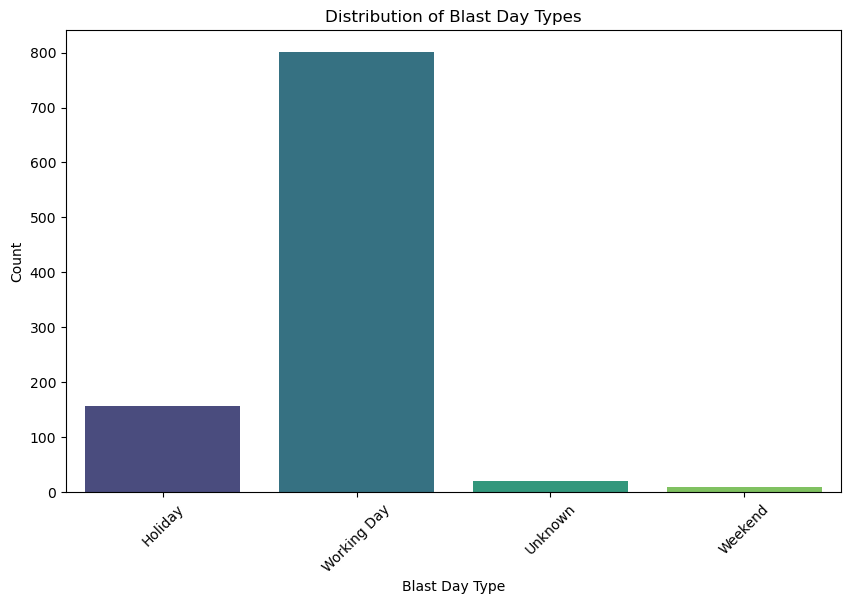

In [39]:
# Countplot for 'Blast Day Type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Blast Day Type', data=df, palette='viridis')
plt.title('Distribution of Blast Day Types')
plt.xlabel('Blast Day Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21940\521911394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Province', data=df, palette='muted', order=df['Province'].value_counts().index)


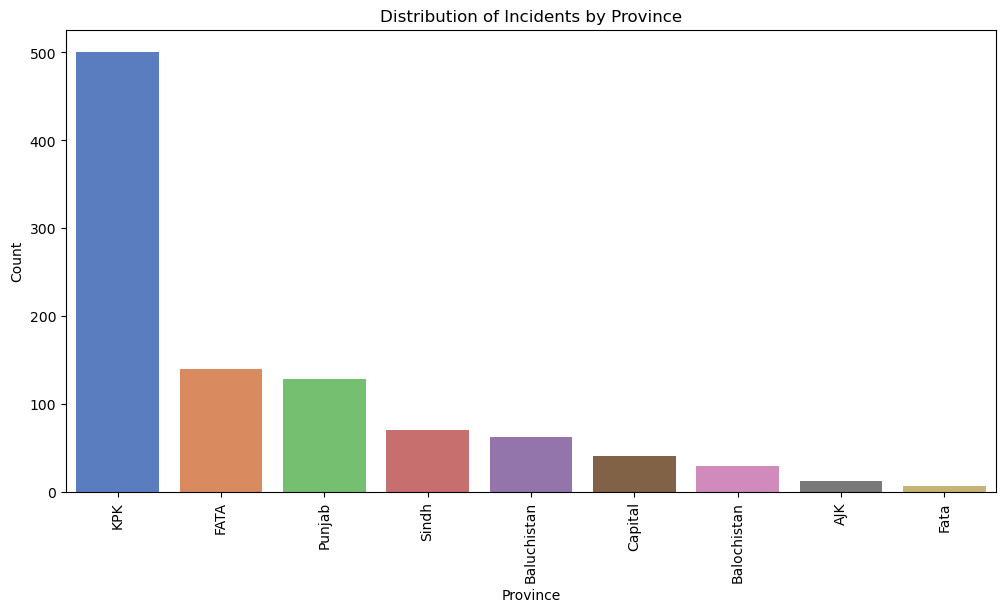

In [41]:
# Countplot for 'Province'
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', data=df, palette='muted', order=df['Province'].value_counts().index)
plt.title('Distribution of Incidents by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21940\950570550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Target Type', data=df, palette='pastel', order=df['Target Type'].value_counts().index)


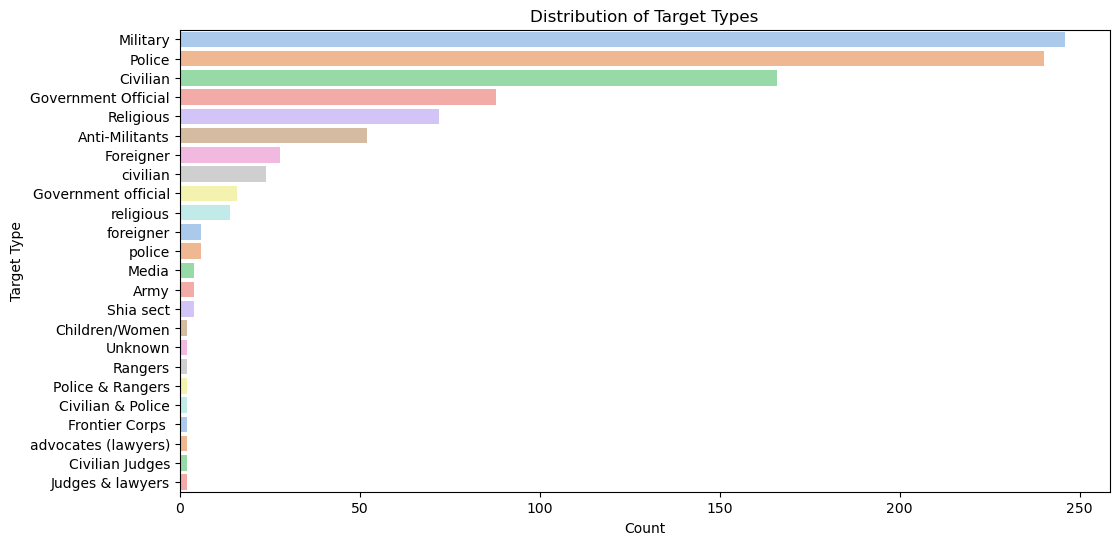

In [43]:
# Countplot for 'Target Type'
plt.figure(figsize=(12, 6))
sns.countplot(y='Target Type', data=df, palette='pastel', order=df['Target Type'].value_counts().index)
plt.title('Distribution of Target Types')
plt.xlabel('Count')
plt.ylabel('Target Type')
plt.show()


In [47]:
#Convert 'Date' to datetime format 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [49]:
df['Month'] = df['Date'].dt.month_name()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21940\1113304758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='Set2', order=['January', 'February', 'March', 'April', 'May', 'June',


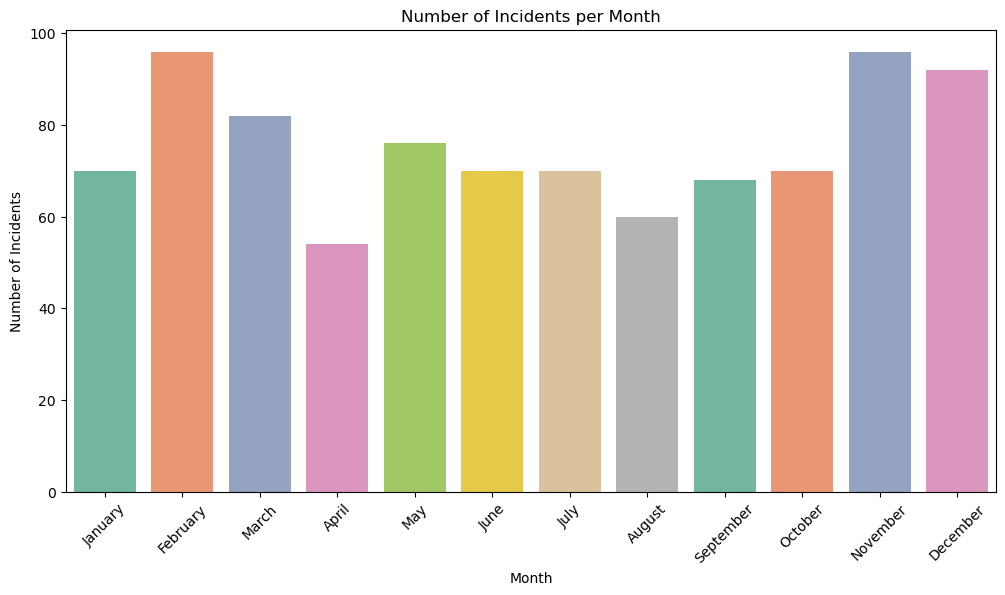

In [51]:
# Countplot for incidents per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, palette='Set2', order=['January', 'February', 'March', 'April', 'May', 'June', 
                                                         'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


In [55]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_columns.corr()


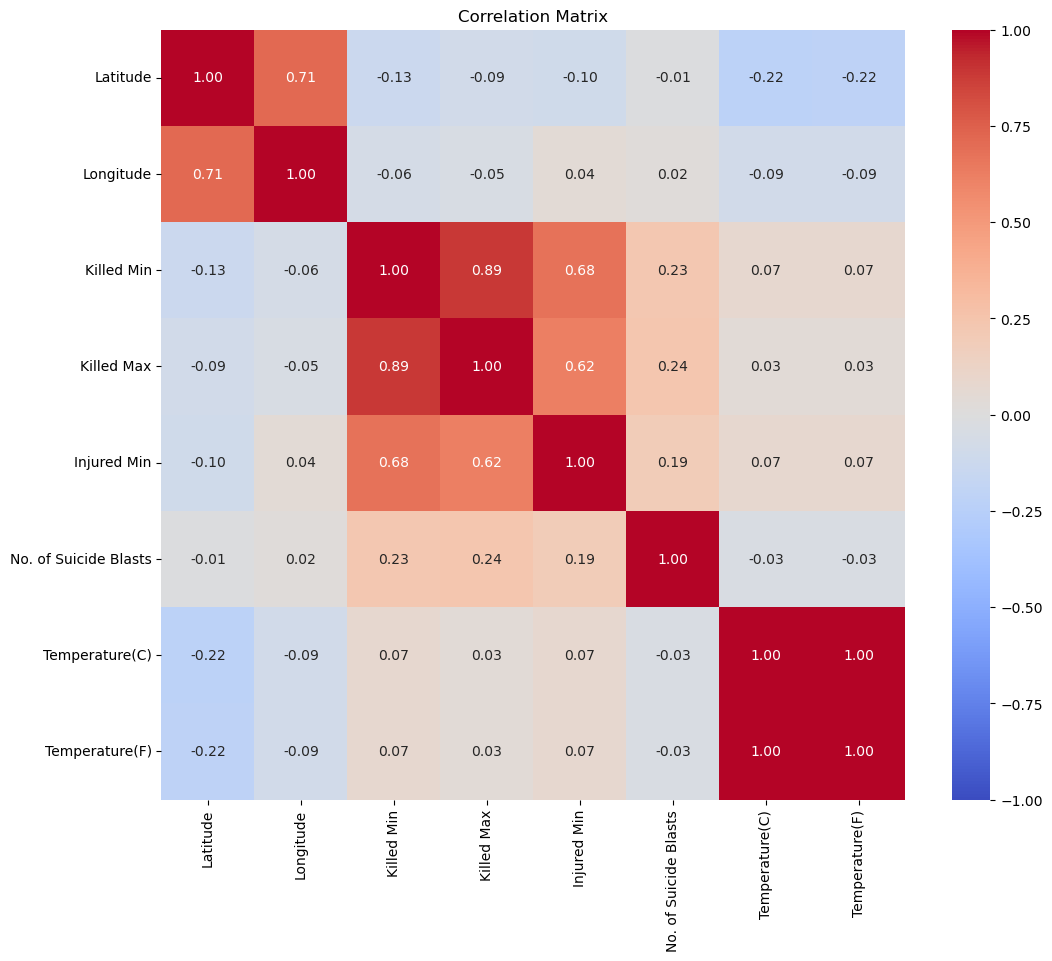

In [57]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21940\3146139540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


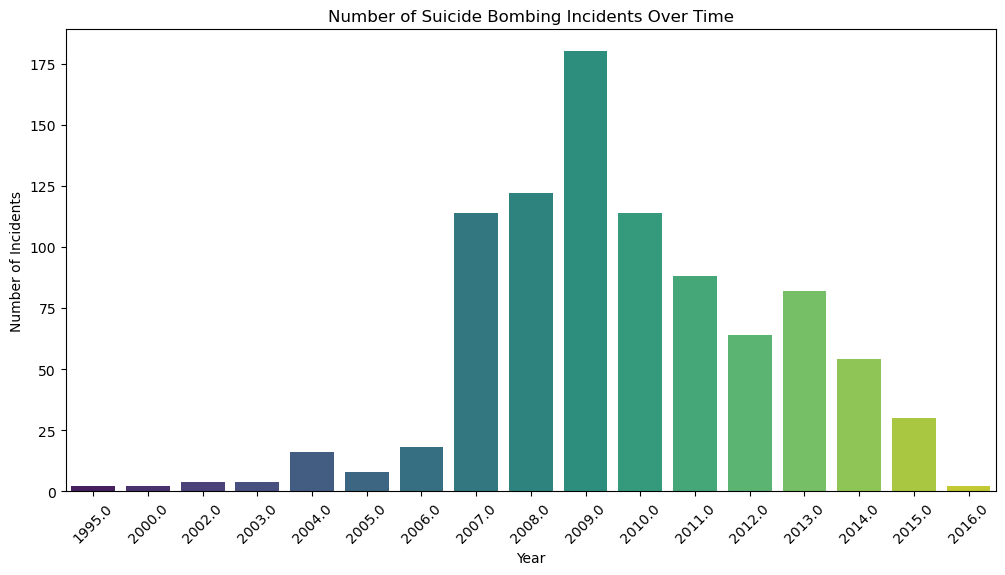

In [59]:
# Extract year from 'Date'
df['Year'] = df['Date'].dt.year

# Countplot for incidents per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Number of Suicide Bombing Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21940\4123286159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinces.index, y=top_provinces.values, palette='viridis')


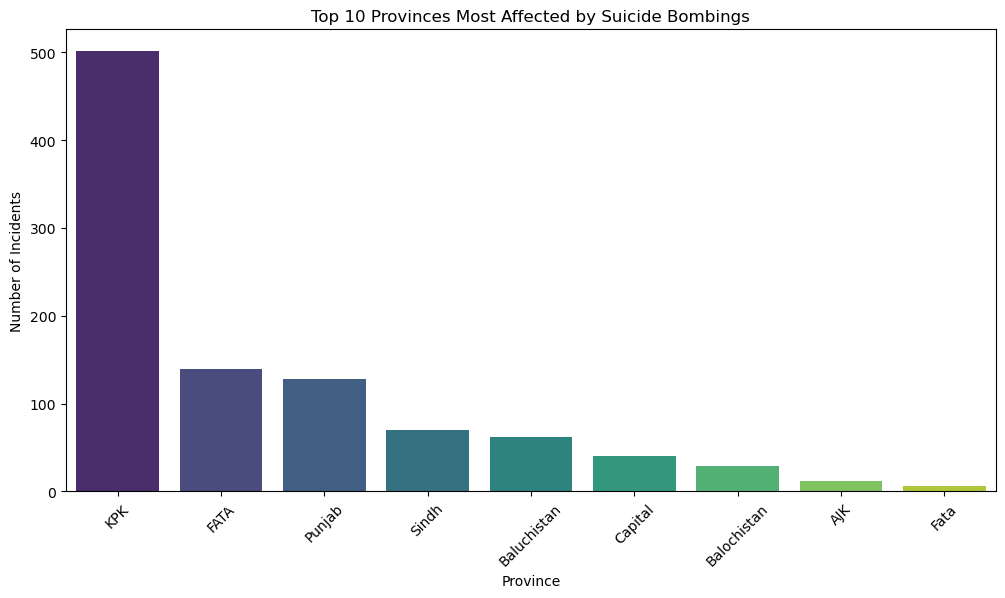

In [61]:
# Top 10 affected provinces
top_provinces = df['Province'].value_counts().head(10)

# Bar plot for top affected provinces
plt.figure(figsize=(12, 6))
sns.barplot(x=top_provinces.index, y=top_provinces.values, palette='viridis')
plt.title('Top 10 Provinces Most Affected by Suicide Bombings')
plt.xlabel('Province')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


In [65]:
print(df[['Killed Max', 'Injured Max', 'Location Sensitivity', 'No. of Suicide Blasts']].dtypes)


Killed Max               float64
Injured Max               object
Location Sensitivity      object
No. of Suicide Blasts    float64
dtype: object


In [73]:
# Convert 'Injured Max' to numeric, coerce errors to NaN
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

# Verify the data types after conversion
print(df[['Killed Max', 'Injured Max', 'Location Sensitivity', 'No. of Suicide Blasts']].dtypes)


Killed Max               float64
Injured Max              float64
Location Sensitivity      object
No. of Suicide Blasts     object
dtype: object


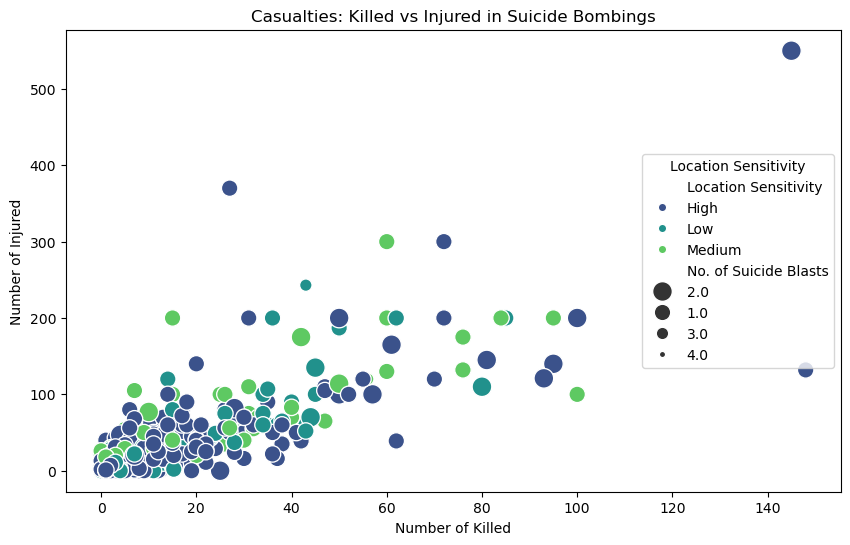

In [75]:
# Scatter plot of Killed vs Injured
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Killed Max', y='Injured Max', data=df, hue='Location Sensitivity', palette='viridis', size='No. of Suicide Blasts', sizes=(20, 200))
plt.title('Casualties: Killed vs Injured in Suicide Bombings')
plt.xlabel('Number of Killed')
plt.ylabel('Number of Injured')
plt.legend(title='Location Sensitivity')
plt.show()


<Figure size 1200x600 with 0 Axes>

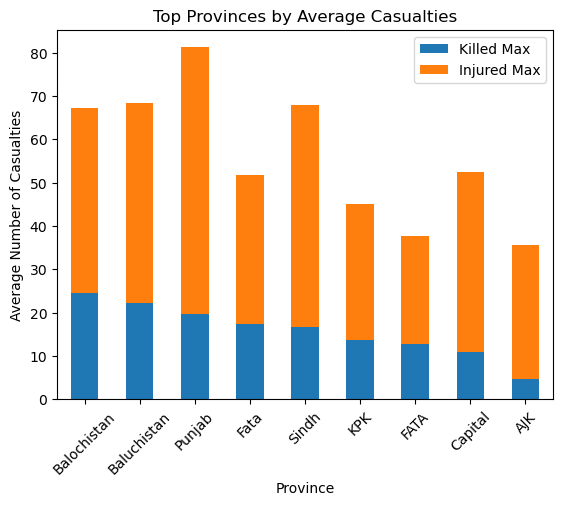

In [79]:
# Bar plot for top affected provinces by average casualties
top_provinces = df.groupby('Province')[['Killed Max', 'Injured Max']].mean().sort_values(by='Killed Max', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_provinces[['Killed Max', 'Injured Max']].plot(kind='bar', stacked=True)
plt.title('Top Provinces by Average Casualties')
plt.xlabel('Province')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45)
plt.show()


### Conclusion and Insights

1. **Trend Over Time:** The number of suicide bombing attacks peaked in certain years, with notable increases and decreases over time.
2. **Geographic Distribution:** Certain provinces are more affected than others, with a concentration of attacks in specific regions.
3. **Casualties:** The total number of casualties (killed and injured) varies by year, highlighting the human impact of these attacks.
4. **Location Categories:** Certain types of locations, such as public places, are more frequently targeted.
5. **Target Types:** The data reveals common target types, which can inform security policies and preventive measures.

### Recommendations

1. **Strengthening Security in High-Risk Areas:** Focus on regions and location categories with higher frequencies of attacks.
2. **Policy Implementation:** Develop policies targeting the protection of common targets identified in the analysis.
3. **Further Research:** Conduct further research to understand the underlying socio-political factors contributing to the trends observed.

